In [12]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import statsmodels.api as sm

In [13]:
import os
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/auliakhoirunnisa/Documents/UofG/projectbeenmade/projectbeenmade/Statistics Analysis Plan on ourworldindata.org


In [14]:
data = pd.read_csv("DataOurWorld.csv",index_col=0)

### Variables Definition
**The response variable:**
- Researchers_in_RD: The density number of millions of researchers in a country compared to its population.

**The covariates:**
- Entity: the list of the countries; Belgium, Finland, Italy, Japan, Malta, Norway, Poland, and Portugal.
- Year: the range of the years from 2010 to 2020.
- Population_using_the_Internet: The share of people per population using the internet.
- Expenditure_on_educationation: The expenditure on education spending.
- Average_years_of_educationcation: The average years of schooling from  16 – 6 age.
- Outbound_mobility_ratioy Ratio: The share of students per population studying abroad.


In [15]:
# Define the preliminary dataset
dataset = data.drop(columns=["Code"])
dataset.rename(columns={"Researchers.in.R.D..per.million.people.": "Researchers_in_RD",
                       "Historical.and.more.recent.expenditure.estimates":"Expenditure_on_education",
                       "Combined...average.years.of.education.for.15.64.years.male.and.female.youth.and.adults":"Average_years_of_education",
                       "Outbound.mobility.ratio..all.regions..both.sexes....":"Outbound_mobility_ratio",
                       "Individuals.using.the.Internet....of.population.":"Population_using_the_Internet", "Year": "Year"},
               inplace=True)
dataset['Entity'] = dataset.Entity.astype('category')
dataset.dtypes # Print data types

Entity                           category
Year                                int64
Researchers_in_RD                 float64
Population_using_the_Internet     float64
Expenditure_on_education          float64
Average_years_of_education        float64
Outbound_mobility_ratio           float64
dtype: object

# Formal Analysis

### Statistical Information

In [16]:
# Statistical information of the dataset
print(dataset.describe())

            Year  Researchers_in_RD  Population_using_the_Internet  \
count    88.0000          88.000000                      88.000000   
mean   2015.0000        4206.610547                      78.882414   
std       3.1804        1851.475666                      12.883951   
min    2010.0000        1417.008400                      53.300000   
25%    2012.0000        2195.951875                      68.154861   
50%    2015.0000        4268.000000                      80.865950   
75%    2018.0000        5466.627850                      89.231971   
max    2020.0000        7720.223600                      98.000010   

       Expenditure_on_education  Average_years_of_education  \
count                 88.000000                   88.000000   
mean                   5.493490                   11.213636   
std                    1.400601                    1.012498   
min                    3.077820                    8.710000   
25%                    4.529872                   10.9

In [17]:
# Select only the numeric columns
numeric_columns_set = dataset.select_dtypes(include=[np.number])

In [18]:
# Checking the skewness of each numeric variable
numeric_columns_set.apply(lambda x: skew(x.dropna()))

Year                             0.000000
Researchers_in_RD                0.114058
Population_using_the_Internet   -0.387310
Expenditure_on_education         0.106733
Average_years_of_education      -1.053083
Outbound_mobility_ratio          1.441310
dtype: float64

It shows that there is a quite high right skewness on the Outbound_mobility_ratio variable. Hence, a square-root transformation will be applied here.

In [19]:
# Applying a root-square transformation
sqrt_Outbound_mobility_ratio = np.sqrt(numeric_columns_set["Outbound_mobility_ratio"])

# Checking the skewness of the transformed variable
sqrt_Outbound_mobility_ratio.skew()

0.630541530169052

The result of skewness is less than 1 which means that the data distribution is relatively balanced.

In [20]:
# Define the new numeric dataset
numeric_columns_transform = dataset.drop(['Entity', 'Outbound_mobility_ratio'], axis = 1)
numeric_columns_transform['sqrt_Outbound_mobility_ratio'] = sqrt_Outbound_mobility_ratio
numeric_columns_transform.dtypes

Year                               int64
Researchers_in_RD                float64
Population_using_the_Internet    float64
Expenditure_on_education         float64
Average_years_of_education       float64
sqrt_Outbound_mobility_ratio     float64
dtype: object

### Visualisation of the Statistical Information

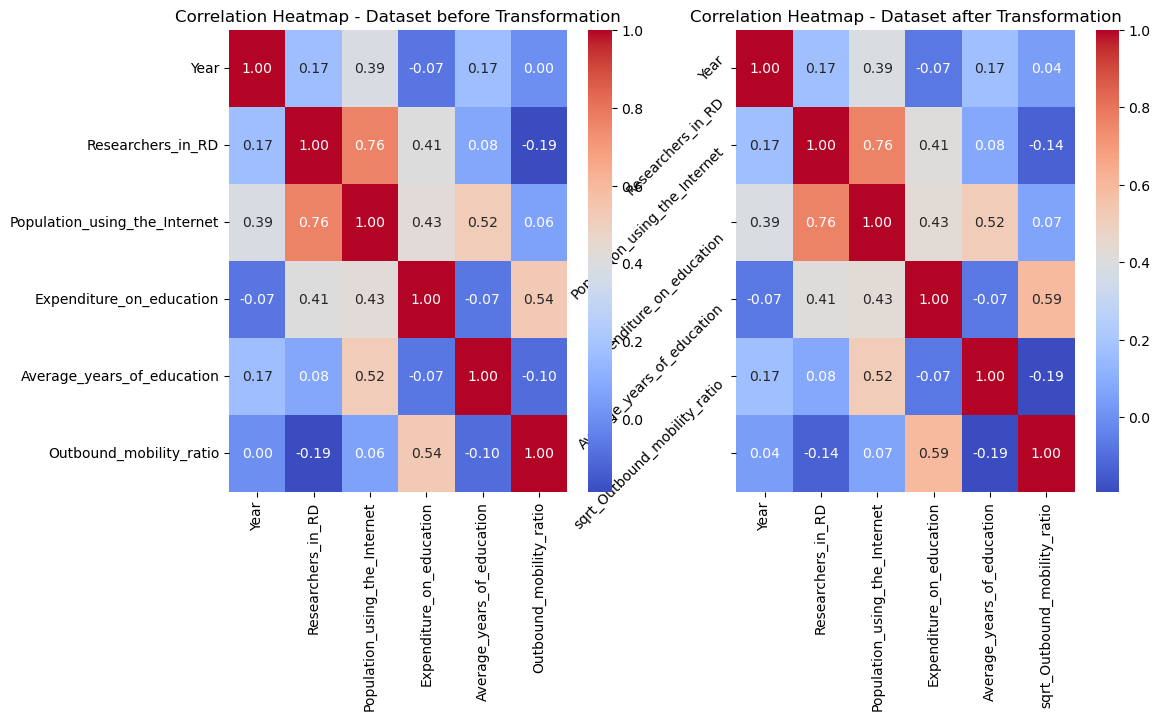

In [21]:
# Visualizing the heatmap from both dataset
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(numeric_columns_set.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax[0])
ax[0].set_title('Correlation Heatmap - Dataset before Transformation')
sns.heatmap(numeric_columns_transform.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax[1])
ax[1].set_title('Correlation Heatmap - Dataset after Transformation')
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=45, ha='right')
plt.show()

It shows that there is not much change in the correlation between before and after transformation. It means that the transformation didn't have a significant impact on the linear relationships between those variables. In other words, the transformation may not have substantially altered the strength and direction of the associations among the variables.

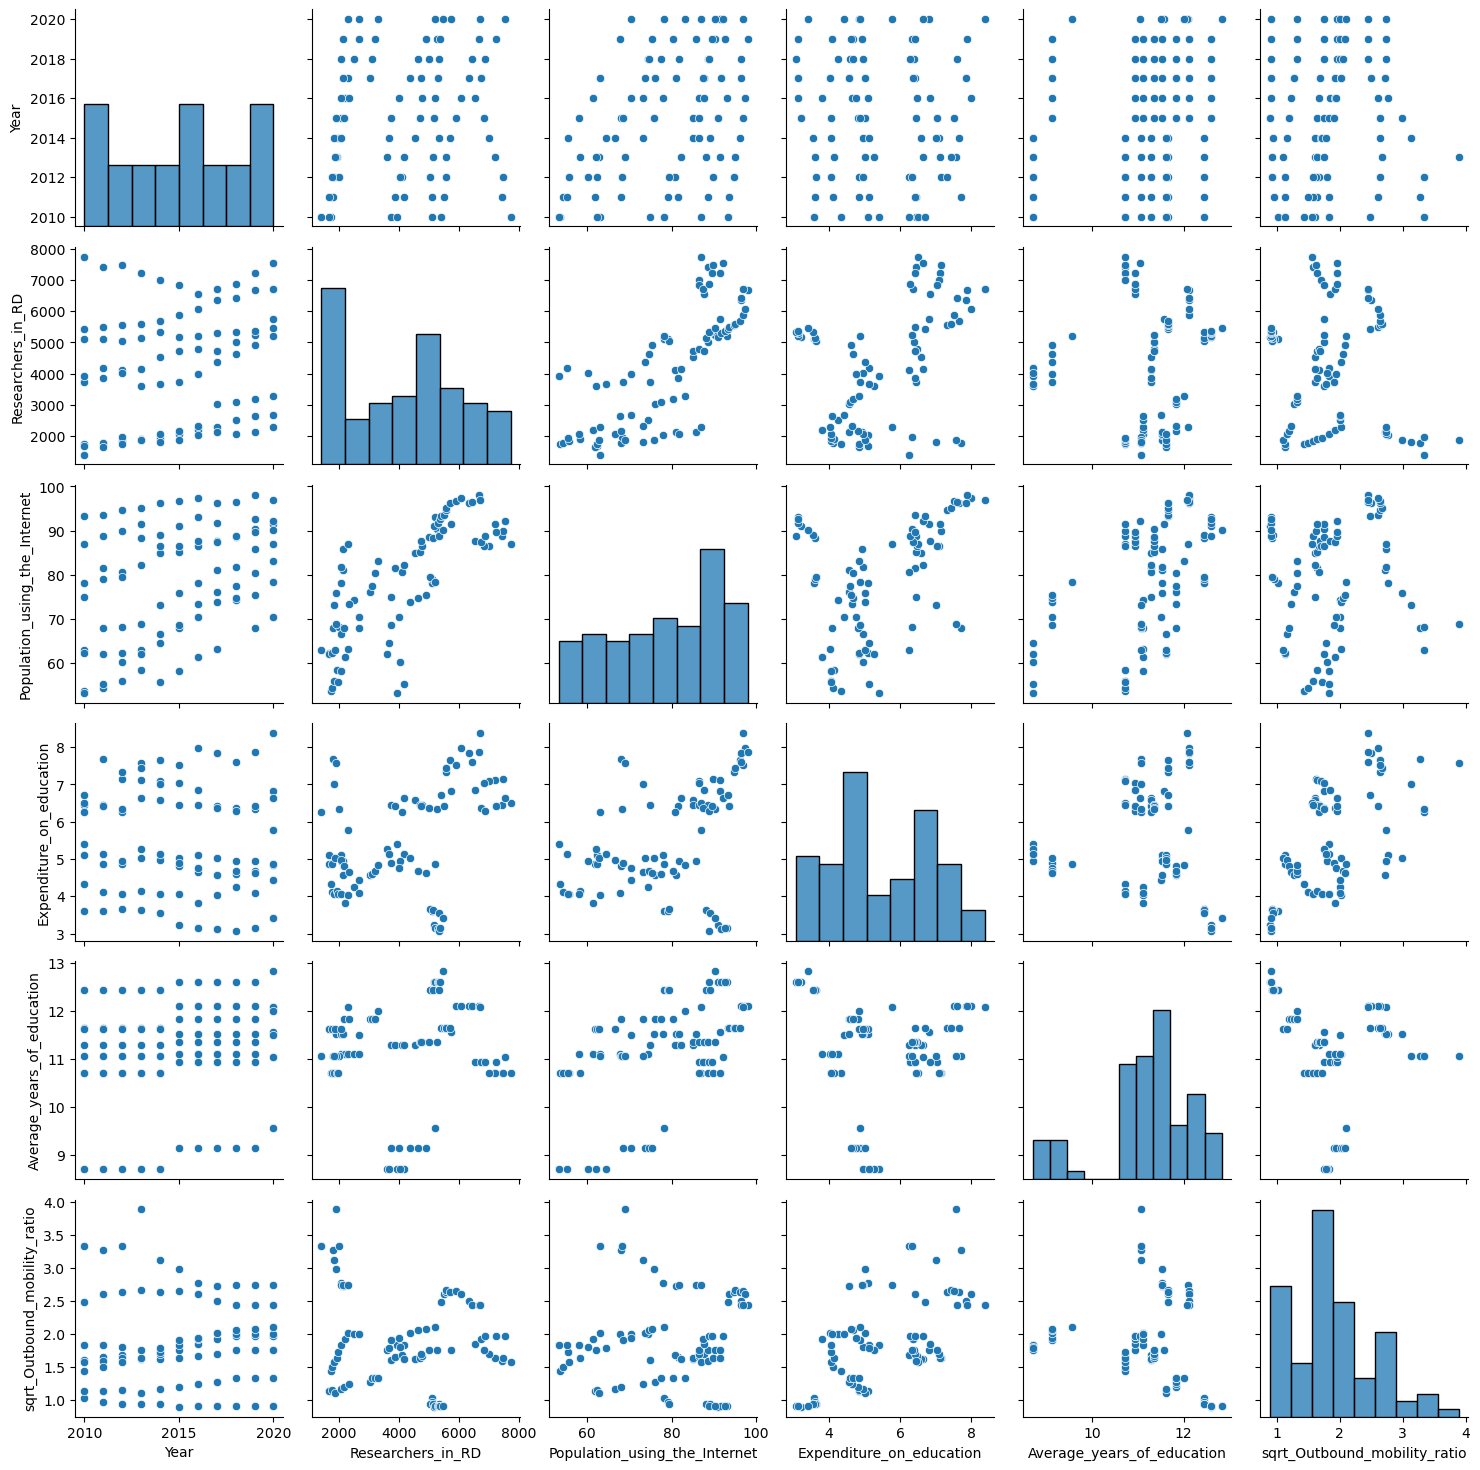

In [22]:
# Visualize the relationships between variables for the new dataset
g = sns.PairGrid(numeric_columns_transform)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Relationship between Response Variable and Covariates by Correlation Matrix

In [23]:
# Define the final data set
response_y = dataset["Researchers_in_RD"]
covariates_x = pd.concat([dataset["Entity"],numeric_columns_transform.drop("Researchers_in_RD", axis = 1)], axis = 1)
dataset_final = pd.concat([covariates_x, response_y], axis = 1)

In [24]:
# correlation matrix
numeric_columns_transform.corr()

Year  Researchers_in_RD  \
Year                           1.000000           0.167686   
Researchers_in_RD              0.167686           1.000000   
Population_using_the_Internet  0.385732           0.764829   
Expenditure_on_education      -0.071105           0.410655   
Average_years_of_education     0.167587           0.078069   
sqrt_Outbound_mobility_ratio   0.044625          -0.135987   

                               Population_using_the_Internet  \
Year                                                0.385732   
Researchers_in_RD                                   0.764829   
Population_using_the_Internet                       1.000000   
Expenditure_on_education                            0.428986   
Average_years_of_education                          0.517895   
sqrt_Outbound_mobility_ratio                        0.066743   

                               Expenditure_on_education  \
Year                                          -0.071105   
Researchers_in_RD                              0.410655   
Population_using_the_Internet                  0.428986   
Expenditure_on_education                       1.000000   
Average_years_of_education                    -0.069287   
sqrt_Outbound_mobility_ratio                   0.594320   

                               Average_years_of_education  \
Year                                             0.167587   
Researchers_in_RD                                0.078069   
Population_using_the_Internet                    0.517895   
Expenditure_on_education                        -0.069287   
Average_years_of_education                       1.000000   
sqrt_Outbound_mobility_ratio                    -0.192768   

                               sqrt_Outbound_mobility_ratio  
Year                                               0.044625  
Researchers_in_RD                                 -0.135987  
Population_using_the_Internet                      0.066743  
Expenditure_on_education                           0.594320  
Average_years_of_education                        -0.192768  
sqrt_Outbound_mobility_ratio                       1.000000

Based on the table above, the explanatory variable which has the biggest correlation with response Researchers_in_RD is Population_using_the_Internet. It is figured that Population_using_the_Internet has a strong and positive correlation with the response variable.

### Multicollineriaty

In [25]:
# The response variable
response_y = dataset["Researchers_in_RD"]

# The explanatory variables encoded
covariates_x = pd.concat([dataset["Entity"],numeric_columns_transform.drop("Researchers_in_RD", axis = 1)], axis = 1)
covariates_X_encoded = pd.get_dummies(covariates_x, columns = ["Entity"], drop_first = True, dtype = float)
covariates_X_encoded = sm.add_constant(covariates_X_encoded)

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = covariates_X_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(covariates_X_encoded.values, i) for i in range(covariates_X_encoded.shape[1])]
print(vif_data)

                         Variable           VIF
0                           const  1.792621e+06
1                            Year  4.890211e+00
2   Population_using_the_Internet  1.772505e+01
3        Expenditure_on_education  1.308169e+01
4      Average_years_of_education  7.247765e+01
5    sqrt_Outbound_mobility_ratio  1.988495e+01
6                  Entity_Finland  4.040099e+00
7                    Entity_Italy  1.630936e+01
8                    Entity_Japan  1.584474e+01
9                    Entity_Malta  1.425622e+01
10                  Entity_Norway  9.672218e+00
11                  Entity_Poland  8.573928e+00
12                Entity_Portugal  4.956067e+01


Variance Inflation Factor (VIF) – The VIFs of the linear regression indicate the degree to which the variances in the regression estimates are increased due to multicollinearity. In general, a VIF above 10 is often considered a sign of problematic multicollinearity. One of the options solution which can be considered include removing highly correlated predictors, combining them, or using regularization techniques. The high VIF for "Average_years_of_education" variable suggests that this may be highly correlated with others in the model.

# Accessing model fit

### General model

The model utility test is conducted by:

**The Null-hypothesis $(H_0)$**:
There is no significant linear relationship between the response variable ${\mathrm{Researchers\_in\_RD}}$ and any of the covariates. In other words, all regression coefficients are equal to zero, indicating that none of the variables have a significant effect.

**The Alternative-hypothesis $(H_a)$**:
There is a significant linear relationship between the response variable ${\mathrm{Researchers\_in\_RD}}$ and at least one of the covariates. At least one regression coefficient is not equal to zero, suggesting that the model is useful in explaining the variation in the response variable.

With the significance level is 5%.  

In [26]:
model = ols("Researchers_in_RD ~ Year+Entity+Population_using_the_Internet+Expenditure_on_education+Average_years_of_education+sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Researchers_in_RD   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     284.1
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.51e-57
Time:                        18:51:42   Log-Likelihood:                -617.57
No. Observations:                  88   AIC:                             1261.
Df Residuals:                      75   BIC:                             1293.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The regression model is expressed by the formula provided below:

$$\widehat{\mathrm{Researchers\_in\_RD}} = -9.636 \times 10^4 + 2330.9947 \times {\mathrm{Entity\_Finland}} - 1024.3709 \times {\mathrm{Entity\_Italy}} + 1196.8849 \times {\mathrm{Entity\_Japan}} - 2030.3696 \times {\mathrm{Entity\_Malta}} + 840.9108 \times {\mathrm{Entity\_Norway}} - 1334.6851 \times {\mathrm{Entity\_Poland}} + 559.6756 \times {\mathrm{Entity\_T.Portugal}} + 48.0708 \times \text{Year} + 38.0416 \times {\mathrm{Population\_using\_the\_Internet}} + 223.9500 \times {\mathrm{Expenditure\_on\_education}} - 36.4745 \times {\mathrm{Average\_years\_of\_education}} - 100.7029 \times {\mathrm{sqrt\_Outbound\_mobility\_ratio}}$$

With:  
${\mathrm{Entity\_Finland}}$, ${\mathrm{Entity\_Italy}}$, ${\mathrm{Entity\_Japan}}$, ${\mathrm{Entity\_Malta}}$, ${\mathrm{Entity\_Norway}}$, ${\mathrm{Entity\_Poland}}$, and ${\mathrm{Entity\_Portugal}}$ are binary variables indicating the presence or absence of the respective countries with the base variable of ${\mathrm{Belgium}}$.

**Model interpretation**
- The R-squared value is $0.978$, indicating that approximately $97.8%$ of the variability in the dependent variable is explained by the covariates in the model.
- F-statistic is $284.1$ and the associated p-value or Prob (F-statistic) figured at $2.51x10^{-57}$. The F-statistic tests the overall significance of the model. The small p-value suggests that there is strong evidence to reject the null hypothesis that all coefficients are zero. In other words, the overall model is statistically significant.
- The adjusted R-squared is $0.975$ which indicates that approximately 97.5% of the variability in the response variable (Researchers in RD) can be explained by the independent variables in the model, considering the number of predictors.
- After analyzing the p-values, it becomes apparent that both $p-value$, $\mathrm{Average\_years\_of\_education}$, and $\mathrm{sqrt\_Outbound\_mobility\_ratio}$, are not statistically significant. This emphasizes the importance of thorough model diagnostics, including checking assumptions such as multicollinearity, and warrants consideration in the subsequent model selection process using AIC. Ensuring the chosen model captures essential patterns without unnecessary complexity is crucial for robust and reliable results.
- On the other hand, based on the given result a sign of multicollinearity occurs when independent variables in the model are highly correlated, making it challenging for the model to estimate the individual effects of each variable. This can lead to unstable coefficient estimates and inflated standard errors.


Although the model appears to be statistically significant, explaining a high proportion of the variance in response variable, attention should be given to potential multicollinearity issues and the interpretation of individual coefficients.
Subsequently, a thorough model selection process will be conducted to identify the most optimal model among various alternatives. This process involves evaluating different combinations of variables to ensure the selected model captures essential patterns without unnecessary complexity.

## Checking assumptions

### 1. Residuals VS Explanatory variables

The "Residuals vs Explanatory variables" plot is used to check for the assumption of linearity and to identify any potential patterns or trends in the relationship between residuals and individual explanatory variables. This plot helps assess whether the relationship between the response variable and each explanatory variable is adequately captured by the linear regression model.

In [27]:
dataset_final['Residuals'] = result.resid

/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


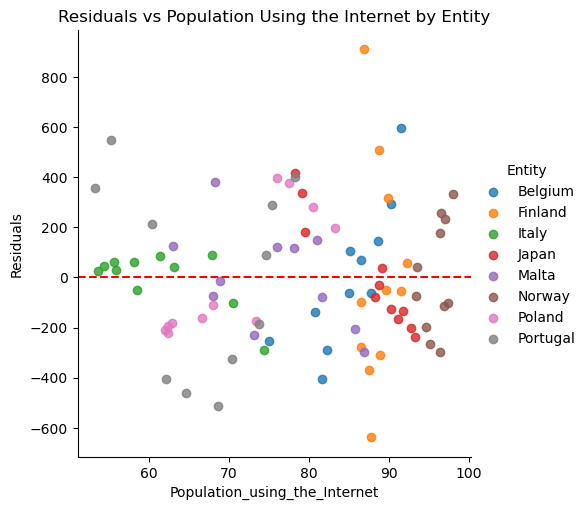

In [28]:
# Plot residuals against each explanatory variable against residuals by entity
sns.lmplot(data=dataset_final, x='Population_using_the_Internet', y='Residuals', hue='Entity', fit_reg=False)
plt.title('Residuals vs Population Using the Internet by Entity')
plt.axhline(y=0,ls="--",color="red")
plt.show()

The data shows consistent variability across the axis, indicating adherence to the assumption of equal variability. While a potential outlier is observed, it does not significantly impact the overall analysis. Additionally, the absence of systematic curvature suggests a linear relationship between variables.

/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


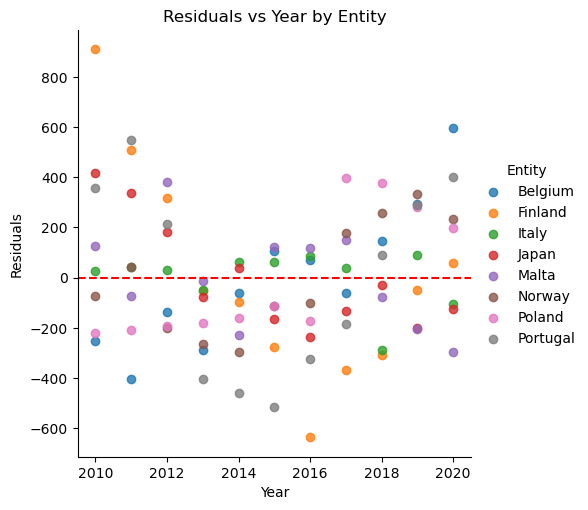

In [29]:
# Plot residuals against each explanatory variable against residuals by entity
sns.lmplot(data=dataset_final, x='Year', y='Residuals', hue='Entity', fit_reg=False)
plt.title('Residuals vs Year by Entity')
plt.axhline(y=0,ls="--",color="red")
plt.show()

The data displays consistent variability along the axis, suggesting that the assumption of equal variability is met. Although a potential outlier is identified, its impact on the overall analysis is deemed minimal. Furthermore, the absence of systematic curvature indicates a linear relationship between variables.

/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


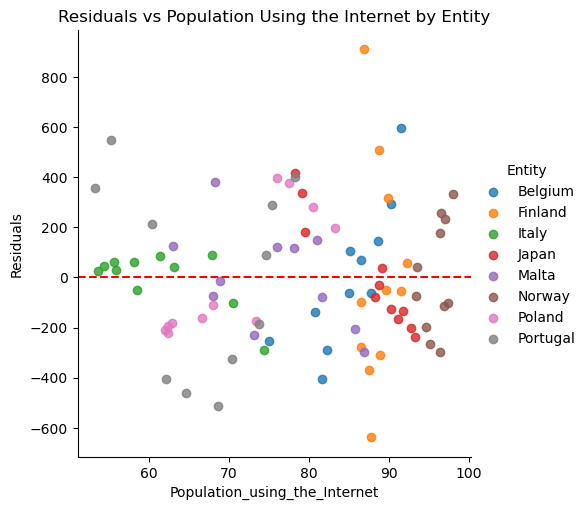

In [30]:
# Assuming 'Residuals' is the correct column name in dataset_final
sns.lmplot(data=dataset_final, x='Population_using_the_Internet', y='Residuals', hue='Entity', fit_reg=False)
plt.title('Residuals vs Population Using the Internet by Entity')
plt.axhline(y=0, ls="--", color="red")
plt.show()

The distribution's variability along the axis is roughly equal, with no significant outlier identified, although there is a point that appears to be an outlier. Additionally, there is no noticeable systematic curvature present. These observations indicate a generally linear relationship between variables, affirming the reliability of the regression model.

/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


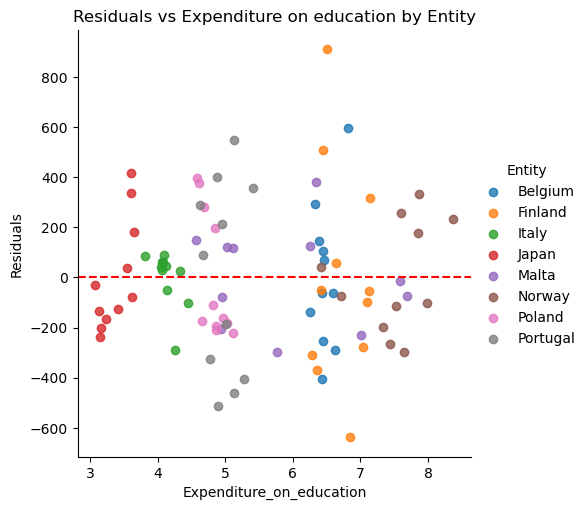

In [31]:
# Scatterplot of the residuals against Expenditure on education against residuals by entity
sns.lmplot(data = dataset_final, x='Expenditure_on_education', y='Residuals', hue='Entity', fit_reg=False)
plt.title('Residuals vs Expenditure on education by Entity')
plt.axhline(y=0,ls="--",color="red")
plt.show()

The spread of data points seems relatively uniform along the axis, and while there is a point that may be considered an outlier, no prominent outliers are evident. Furthermore, there is no apparent systematic curvature in the data. These findings suggest a predominantly linear association between variables, underscoring the dependability of the regression model.

/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


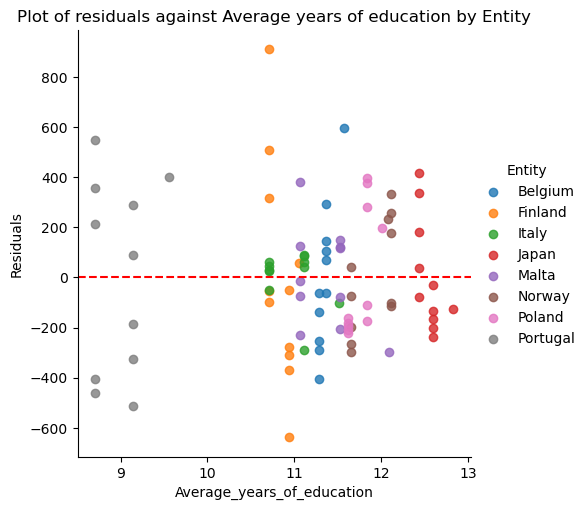

In [32]:
# Scatterplot of the residuals against Average years of education
sns.lmplot(data=dataset_final,x='Average_years_of_education',y='Residuals',hue='Entity', fit_reg=False)
plt.title('Plot of residuals against Average years of education by Entity')
plt.axhline(y=0,ls="--",color="red")
plt.show()

The residuals display a modest variability, diminishing as the explanatory variable increases, aligning with the non-significant relationship observed in the OLS model results. This implies a potential breach of the assumption, emphasizing the necessity for further investigation.

/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/auliakhoirunnisa/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


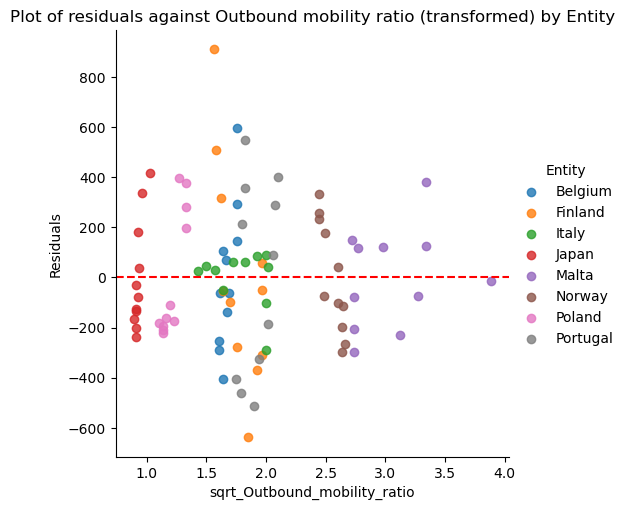

In [33]:
# scatterplot of the residuals against Outbound mobility ratio
sns.lmplot(data=dataset_final,x='sqrt_Outbound_mobility_ratio',y='Residuals',hue='Entity', fit_reg=False)
plt.title('Plot of residuals against Outbound mobility ratio (transformed) by Entity')
plt.axhline(y=0,ls="--",color="red")
plt.show()

The violation of the constant variance assumption, evident in the decreasing variability as the explanatory variable increases, challenges the reasonability of the model assumption. This discrepancy aligns with the non-significant relationship found in the OLS model results, emphasizing the need for a thorough examination of its adherence to the expected conditions.


### 2. Residuals VS  Fitted Values

In [ ]:
# Residuals against the fitted values
sp9=sns.relplot(x=result.fittedvalues,y=result.resid)
sp9.set(xlabel='Fitted number of Researchers in R&D(per million population)',ylabel='Residuals',title='Plot of residuals against fitted values')
plt.axhline(y=0,ls="--",color="red")
plt.show()

The "Residuals VS Fitted Values" plot reveals increasing variability in residuals as fitted values rise, indicating potential heteroscedasticity. While the OLS model's overall significance is affirmed by the F-statistic, the presence of non-significant coefficients (e.g., $\mathrm{Average\_years\_of\_education}$ and $\mathrm{sqrt\_Outbound\_mobility\_ratio}$) prompts further examination. A strategy involving model selection, guided by AIC, is recommended to address these issues and refine the model for enhanced reliability and predictive accuracy.

### 3. Histogram and Normality Probability Plot (Q-Q Plot) of Residuals

In [ ]:
# Check if the residuals are normally distributed by Histogram of Residuals
sp10=sns.histplot(x=result.resid,kde=True)
sp10.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

The histogram plot illustrates a symmetric distribution of residuals around zero, suggesting conformity to the assumptions of linear regression. This aligns with the assumption that the errors are normally distributed and supports the validity of the linear regression model.

In [ ]:
# Check if the residuals are normally distributed by QQ-plot
sm.qqplot(result.resid, line='s')
plt.title('QQ-plot of Residuals')
plt.show()

The scatterplot with the blue dots reveals a consistent pattern along the diagonal line, with only a slight deviation in the upper tail. This observation signifies that the distribution of the data adheres to the assumption of homoscedasticity in linear regression, implying constant variance across all levels of the independent variable. Additionally, the data's alignment with the normal distribution, as indicated by the constant and evenly distributed blue dots, supports the assumption of normally distributed errors in the linear regression model. These findings contribute to the overall validity of the regression analysis, reinforcing the robustness of the linear regression assumptions.

# Model Selection (Backward selection)

### Find the best model with the smallest AIC by removing one variable

In [ ]:
AIC1 = {}

In [ ]:
# Obtain objective criteria for the general model
print(result.rsquared_adj) # R2 value
print(result.aic) # AIC value
print(result.bic) # BIC value
AIC1['model']=result.aic

In [ ]:
# 1. Omit the Entity variable
model1 = ols("Researchers_in_RD ~ Year+Population_using_the_Internet+Expenditure_on_education+Average_years_of_education+sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result1=model1.fit()
# Obtain objective criteria for the model omitting Outbound_mobility_ratio
print(result1.rsquared_adj) # R2 value
print(result1.aic) # AIC value
print(result1.bic) # BIC value
AIC1['model1']=result1.aic

In [ ]:
# 2. Omit the Outbound mobility ratio (transformed)
model2 = ols("Researchers_in_RD ~ Entity + Year + Population_using_the_Internet + Expenditure_on_education + Average_years_of_education",
            data=dataset_final)
result2=model2.fit()
# Obtain objective criteria for the model omitting Outbound mobility ratio
print(result2.rsquared_adj) # R2 value
print(result2.aic) # AIC value
print(result2.bic) # BIC value
AIC1['model2']=result2.aic

In [ ]:
# 3. Omit Average years of education
model3 = ols("Researchers_in_RD ~ Entity+Year+Population_using_the_Internet+Expenditure_on_education+sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result3=model3.fit()
# Obtain objective criteria for the model omitting average years of education
print(result3.rsquared_adj) # R2 value
print(result3.aic) # AIC value
print(result3.bic) # BIC value
AIC1['model3']=result3.aic

In [ ]:
# 4. Omit Expenditure on education
model4 = ols("Researchers_in_RD ~ Entity + Year + Population_using_the_Internet + Average_years_of_education + sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result4=model4.fit()
# Obtain objective criteria for the model omitting Expenditure_on_education
print(result4.rsquared_adj) # R2 value
print(result4.aic) # AIC value
print(result4.bic) # BIC value
AIC1['model4']=result4.aic

In [ ]:
# 5. Omit Population using the Internet
model5 = ols("Researchers_in_RD ~ Entity + Year + Expenditure_on_education + Average_years_of_education + sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result5=model5.fit()
# Obtain objective criteria for the model omitting Population using the Internet
print(result5.rsquared_adj) # R2 value
print(result5.aic) # AIC value
print(result5.bic) # BIC value
AIC1['model5']=result5.aic

In [ ]:
# 6. Omit Year
model6 = ols("Researchers_in_RD ~ Entity + Population_using_the_Internet + Expenditure_on_education + Average_years_of_education + sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result6=model6.fit()
# Obtain objective criteria for the model omitting Year
print(result6.rsquared_adj) # R2 value
print(result6.aic) # AIC value
print(result6.bic) # BIC value
AIC1['model6']=result6.aic

In [ ]:
best_model = min(AIC1, key=AIC1.get)
print(f"The best model so far：{best_model}，AIC：{AIC1[best_model]}")

The AIC (Akaike Information Criterion) is a measure used for model selection, particularly in the context of linear regression and other statistical models. It is designed to balance the goodness of fit of the model with the complexity of the model.

Based on the given result, AIC penalizes the models to **remove the variable of the $\mathrm{Average\_years\_of\_education}$**, showed by the lowest AIC value.
Then, we need to focus on the remaining five covariates, **$\mathrm{Entity}$, $\mathrm{Year}$, $\mathrm{Population\_using\_the\_Internet}$, $\mathrm{Expenditure\_on\_education}$, $\mathrm{sqrt\_Outbound\_mobility\_ratio}$**.

### Find the best model with the smallest AIC by removing two variables

In [ ]:
AIC2 = {}
AIC2['model3']=result3.aic

In [ ]:
# 7. Omit Average years of education and Outbound mobility ratio (transformed)
model32 = ols("Researchers_in_RD ~ Year+Entity+Population_using_the_Internet+Expenditure_on_education",
            data=dataset_final)
result32=model32.fit()
# Obtain objective criteria for the model omitting Average years of education and Outbound mobility ratio (transformed)
print(result32.rsquared_adj) # R2 value
print(result32.aic) # AIC value
print(result32.bic) # BIC value
AIC2['model32']=result32.aic

In [ ]:
# 8. Omit Average years of education and Expenditure on education
model34 = ols("Researchers_in_RD ~ Year+Entity+Population_using_the_Internet+sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result34=model34.fit()
# Obtain objective criteria for the model omitting Average years of education and Expenditure on education
print(result34.rsquared_adj) # R2 value
print(result34.aic) # AIC value
print(result34.bic) # BIC value
AIC2['model34']=result34.aic

In [ ]:
# 9. Omit Average years of education and Population using the Internet
model35 = ols("Researchers_in_RD ~ Year+Entity+Expenditure_on_education+sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result35=model35.fit()
# Obtain objective criteria for the model omitting Average years of education and Population using the Internet
print(result35.rsquared_adj) # R2 value
print(result35.aic) # AIC value
print(result35.bic) # BIC value
AIC2['model35']=result35.aic

In [ ]:
# 10. Omit Average years of education and Entity
model31 = ols("Researchers_in_RD ~ Population_using_the_Internet+Expenditure_on_education+Year+sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result31=model31.fit()
# Obtain objective criteria for the model omitting Average years of education and Entity
print(result31.rsquared_adj) # R2 value
print(result31.aic) # AIC value
print(result31.bic) # BIC value
AIC2['model31']=result31.aic

In [ ]:
# 11. Omit Average years of education and Year
model36 = ols("Researchers_in_RD ~ Population_using_the_Internet+Expenditure_on_education+Entity++sqrt_Outbound_mobility_ratio",
            data=dataset_final)
result36=model36.fit()
# Obtain objective criteria for the model omitting Average years of education and Year
print(result36.rsquared_adj) # R2 value
print(result36.aic) # AIC value
print(result36.bic) # BIC value
AIC2['model36']=result36.aic

In [ ]:
best_model = min(AIC2, key=AIC2.get)
print(f"The best model so far：{best_model}，AIC：{AIC2[best_model]}")

Model32 should be chosen since it provides the lowest AIC value. It means that from the second process, it suggest **removing the variable of the $\mathrm{Average\_years\_of\_education}$ and $\mathrm{sqrt\_Outbound\_mobility\_ratio}$** as the predictors.

### Find the best model with the smallest AIC by removing three variables

In [ ]:
AIC3 = {}
AIC3['model32']=result32.aic

In [ ]:
# 12. Omit Outbound mobility ratio (transformed), average years of education and Expenditure on education
model324 = ols("Researchers_in_RD ~ Entity+Population_using_the_Internet+Year",
            data=dataset_final)
result324=model324.fit()
# Obtain objective criteria for the model omitting Outbound mobility ratio, average years of education and Expenditure on education
print(result324.rsquared_adj) # R2 value
print(result324.aic) # AIC value
print(result324.bic) # BIC value
AIC3['model324']=result324.aic

In [ ]:
# 13. Omit Outbound mobility ratio (transformed), average years of education and Population using the Internet
model325 = ols("Researchers_in_RD ~ Entity+Expenditure_on_education+Year",
            data=dataset_final)
result325=model325.fit()
# Obtain objective criteria for the model omitting Outbound mobility ratio, average years of education and Population using the Internet
print(result325.rsquared_adj) # R2 value
print(result325.aic) # AIC value
print(result325.bic) # BIC value
AIC3['model325']=result325.aic

In [ ]:
# 14. Omit Outbound mobility ratio (transformed), average years of education and Entity
model321 = ols("Researchers_in_RD ~ Population_using_the_Internet+Expenditure_on_education+Year",
            data=dataset_final)
result321=model321.fit()
# Obtain objective criteria for the model omitting Outbound mobility ratio and average years of education and Entity
print(result321.rsquared_adj) # R2 value
print(result321.aic) # AIC value
print(result321.bic) # BIC value
AIC3['model321']=result321.aic

In [ ]:
# 15. Omit Outbound mobility ratio (transformed), average years of education and Year
model326 = ols("Researchers_in_RD ~ Population_using_the_Internet+Expenditure_on_education+Entity",
            data=dataset_final)
result326=model326.fit()
# Obtain objective criteria for the model omitting Outbound mobility ratio and average years of education and Year
print(result326.rsquared_adj) # R2 value
print(result326.aic) # AIC value
print(result326.bic) # BIC value
AIC3['model326']=result326.aic

In [ ]:
best_model = min(AIC3, key=AIC3.get)

print(f"The best model is：{best_model}，AIC：{AIC3[best_model]}")

After a thorough model selection process considering various combinations of variables, the model labeled as Model32 demonstrated the lowest Akaike Information Criterion (AIC). This suggests that Model32 strikes an optimal balance between explaining the data well and avoiding unnecessary complexity.

The final chosen model for predicting the density of researchers $\mathrm{Researchers\_in\_RD}$ includes essential components:

- The categorical variable **$\mathrm{Entity}$**, representing different countries.
- The discrete variable **$\mathrm{Year}$**.
- The continuous variable **$\mathrm{Population\_using\_the\_Internet}$**.
- The continuous variable **$\mathrm{Expenditure\_on\_education}$**.

This selection was based on prioritizing goodness of fit, ensuring the model effectively captures the observed data patterns. The chosen variables, Entity, Year, Population using the Internet, and Expenditure on education, are deemed significant in providing insights into the factors influencing the density of researchers across different countries.

In addition, the variables that removed from the general model were shown a unsignificant relationship with our reponse variable according to the 95% confidence interval.So actually we used the model selection using AIC repond to our previous finding.

# Conclusion

## Define the best model

In [ ]:
print(result32.summary())

The final model is expressed by this equation:

$$\widehat{\mathrm{Researchers\_in\_RD}} = -9.636 \times 10^4 + 2343.4222 \times {\mathrm{Entity\_Finland}} - 1062.7203 \times {\mathrm{Entity\_Italy}} + 1180.8975 \times {\mathrm{Entity\_Japan}} - 2181.0786 \times {\mathrm{Entity\_Malta}} + 750.3179 \times {\mathrm{Entity\_Norway}} - 1331.6851 \times {\mathrm{Entity\_Poland}} + 594.6804 \times {\mathrm{Entity\_T.Portugal}} + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$$

With:  
${\mathrm{Entity\_Finland}}$, ${\mathrm{Entity\_Italy}}$, ${\mathrm{Entity\_Japan}}$, ${\mathrm{Entity\_Malta}}$, ${\mathrm{Entity\_Norway}}$, ${\mathrm{Entity\_Poland}}$, and ${\mathrm{Entity\_Portugal}}$ are binary variables indicating the presence or absence of the respective countries with the base variable of ${\mathrm{Belgium}}$.


Then detailed as follow:

*   Belgium
$\widehat{\mathrm{Researchers\_in\_RD_{Belgium}}} = -9.636 \times 10^4 + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$

*   Finland      
$\widehat{\mathrm{Researchers\_in\_RD_{Finland}}} = -94016.5778 + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$

*   Italy      
$\widehat{\mathrm{Researchers\_in\_RD_{Italy}}} = -97422.7203 + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$

*   Japan      
$\widehat{\mathrm{Researchers\_in\_RD_{Japan}}} = -95179.1025 + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$

*   Malta      
$\widehat{\mathrm{Researchers\_in\_RD_{Malta}}} = -98541.0786 + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$

*   Norway        
$\widehat{\mathrm{Researchers\_in\_RD_{Malta}}} = -95609.6821 + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$

*   Poland            
$\widehat{\mathrm{Researchers\_in\_RD_{Poland}}} = -97691.9901 + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$

*   Portugal
$\widehat{\mathrm{Researchers\_in\_RD_{Portugal}}} = -95765.3196 + 45.0273 \times \text{Year} + 37.8351 \times {\mathrm{Population\_using\_the\_Internet}} + 208.5590 \times {\mathrm{Expenditure\_on\_education}}$

## Checking Assumption

In [ ]:
# Residuals against the fitted values (for the best model)
sp11=sns.relplot(x=result32.fittedvalues,y=result32.resid)
sp11.set(xlabel='Fitted number of Researchers in R&D(per million population)',ylabel='Residuals',title='Plot of residuals against fitted values')
plt.axhline(y=0,ls="--",color="red")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=result.fittedvalues, y=result.resid)
plt.xlabel('Fitted number of Researchers in R&D (per million population)')
plt.ylabel('Residuals')
plt.title('Plot of residuals against fitted values for the initial model')
plt.axhline(y=0, ls="--", color="red")

plt.subplot(1, 2, 2)
sns.scatterplot(x=result32.fittedvalues, y=result32.resid)
plt.xlabel('Fitted number of Researchers in R&D (per million population)')
plt.ylabel('Residuals')
plt.title('Plot of residuals against fitted values for the best model')
plt.axhline(y=0, ls="--", color="red")

plt.tight_layout()

In [ ]:
# Check if the residuals of the best model are normally distributed
sp12=sns.histplot(x=result32.resid,kde=True)
sp12.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

In [ ]:
# Check if the residuals of the best model are normally distributed by QQ-plot
sm.qqplot(result32.resid, line='s')
plt.title('QQ-plot of Residuals')
plt.show()

As we can see from the comparison of the two graphs of residuals VS fitted values in the best model and the general model, there seems not to be a significant change. Even though the best model does have smaller AIC, it does not fix the slight unconstant variation problem. This might result from the lack of data quality and some outliers.

Key observations from the residual of checking assumptions plot include:

Random Distribution: The residuals exhibit a random distribution around the zero line, indicating that the assumption of linearity might be reasonable.

Nonlinear Patterns Absence: No discernible curves or systematic patterns are observed, suggesting the absence of obvious nonlinearity in the relationship between the response variable and the fitted values.

Outliers Presence: Some data points, particularly those with large residuals, appear to be outliers, demanding further investigation into their potential impact on model estimates.

Homogeneity of Variances: The spread of residuals remains relatively consistent across the range of fitted values, implying homogeneity of variances.

Normality: As shown by QQ-plot, a deviation of a single point above the diagonal line in the right tail suggests that this particular observation has a higher value than expected under normality. But the histogram forms a bell-shaped curve, resembling a normal distribution.

In summary, the residual plot suggests that a linear model could be an appropriate choice for modeling the relationship between the response variable and the explanatory variable. However, the existence of potential outliers warrants careful consideration to ensure they do not unduly influence model results.

# SKlearn(Prediction)

In [ ]:
import sklearn as sk

## Obtain the data for the best model

In [ ]:
dataset_final_sklearn = dataset_final
dataset_final_sklearn = dataset_final_sklearn.drop(columns=['Average_years_of_education','sqrt_Outbound_mobility_ratio'])
dataset_final_sklearn_Belgium = dataset_final_sklearn[dataset_final_sklearn['Entity']=='Belgium']
dataset_final_sklearn_Finland = dataset_final_sklearn[dataset_final_sklearn['Entity']=='Finland']
dataset_final_sklearn_Italy = dataset_final_sklearn[dataset_final_sklearn['Entity']=='Italy']
dataset_final_sklearn_Japan = dataset_final_sklearn[dataset_final_sklearn['Entity']=='Japan']
dataset_final_sklearn_Malta = dataset_final_sklearn[dataset_final_sklearn['Entity']=='Malta']
dataset_final_sklearn_Norway = dataset_final_sklearn[dataset_final_sklearn['Entity']=='Norway']
dataset_final_sklearn_Poland = dataset_final_sklearn[dataset_final_sklearn['Entity']=='Poland']
dataset_final_sklearn_Portugal = dataset_final_sklearn[dataset_final_sklearn['Entity']=='Portugal']

## Split the data into Training set and Test set

In [ ]:
dataset_final_sklearn_Belgium['Year_int'] = dataset_final_sklearn_Belgium['Year'] - dataset_final_sklearn_Belgium['Year'].min()

X1 = dataset_final_sklearn_Belgium[['Year_int']]
y1 = dataset_final_sklearn_Belgium['Researchers_in_RD']

split_index = 7
X1_train, X1_test = X1.iloc[:split_index], X1.iloc[split_index:]
y1_train, y1_test = y1.iloc[:split_index], y1.iloc[split_index:]

dataset_final_sklearn_Finland['Year_int'] = dataset_final_sklearn_Finland['Year'] - dataset_final_sklearn_Finland['Year'].min()

X2 = dataset_final_sklearn_Finland[['Year_int']]
y2 = dataset_final_sklearn_Finland['Researchers_in_RD']

X2_train, X2_test = X2.iloc[:split_index], X2.iloc[split_index:]
y2_train, y2_test = y2.iloc[:split_index], y2.iloc[split_index:]

dataset_final_sklearn_Italy['Year_int'] = dataset_final_sklearn_Italy['Year'] - dataset_final_sklearn_Italy['Year'].min()

X3 = dataset_final_sklearn_Italy[['Year_int']]
y3 = dataset_final_sklearn_Italy['Researchers_in_RD']

X3_train, X3_test = X3.iloc[:split_index], X3.iloc[split_index:]
y3_train, y3_test = y3.iloc[:split_index], y3.iloc[split_index:]

dataset_final_sklearn_Japan['Year_int'] = dataset_final_sklearn_Japan['Year'] - dataset_final_sklearn_Japan['Year'].min()

X4 = dataset_final_sklearn_Japan[['Year_int']]
y4 = dataset_final_sklearn_Japan['Researchers_in_RD']

X4_train, X4_test = X4.iloc[:split_index], X4.iloc[split_index:]
y4_train, y4_test = y4.iloc[:split_index], y4.iloc[split_index:]

dataset_final_sklearn_Malta['Year_int'] = dataset_final_sklearn_Malta['Year'] - dataset_final_sklearn_Malta['Year'].min()

X5 = dataset_final_sklearn_Malta[['Year_int']]
y5 = dataset_final_sklearn_Malta['Researchers_in_RD']

X5_train, X5_test = X5.iloc[:split_index], X5.iloc[split_index:]
y5_train, y5_test = y5.iloc[:split_index], y5.iloc[split_index:]

dataset_final_sklearn_Norway['Year_int'] = dataset_final_sklearn_Norway['Year'] - dataset_final_sklearn_Norway['Year'].min()

X6 = dataset_final_sklearn_Norway[['Year_int']]
y6 = dataset_final_sklearn_Norway['Researchers_in_RD']

X6_train, X6_test = X6.iloc[:split_index], X6.iloc[split_index:]
y6_train, y6_test = y6.iloc[:split_index], y6.iloc[split_index:]

dataset_final_sklearn_Poland['Year_int'] = dataset_final_sklearn_Poland['Year'] - dataset_final_sklearn_Poland['Year'].min()

X7 = dataset_final_sklearn_Poland[['Year_int']]
y7 = dataset_final_sklearn_Poland['Researchers_in_RD']

X7_train, X7_test = X7.iloc[:split_index], X7.iloc[split_index:]
y7_train, y7_test = y7.iloc[:split_index], y7.iloc[split_index:]

dataset_final_sklearn_Portugal['Year_int'] = dataset_final_sklearn_Portugal['Year'] - dataset_final_sklearn_Portugal['Year'].min()

X8 = dataset_final_sklearn_Portugal[['Year_int']]
y8 = dataset_final_sklearn_Portugal['Researchers_in_RD']

X8_train, X8_test = X8.iloc[:split_index], X8.iloc[split_index:]
y8_train, y8_test = y8.iloc[:split_index], y8.iloc[split_index:]

## Fit the linear models

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

model4 = LinearRegression()
model4.fit(X4_train, y4_train)

model5 = LinearRegression()
model5.fit(X5_train, y5_train)

model6 = LinearRegression()
model6.fit(X6_train, y6_train)

model7 = LinearRegression()
model7.fit(X7_train, y7_train)

model8 = LinearRegression()
model8.fit(X8_train, y8_train)

## Visualize the prediction

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

test_predictions1 = model1.predict(X1_test)

test_rmse1 = mean_squared_error(y1_test, test_predictions1, squared=False)

plt.figure(figsize=(10, 6))
plt.scatter(X1_train, y1_train, color='blue', label='Training data')
plt.scatter(X1_test, y1_test, color='green', label='Testing data')
plt.scatter(X1_test, test_predictions1, color='red', label='Predictions', marker='o')
plt.xlabel('Year from 2010')
plt.ylabel('Number of Researchers in R&D')
plt.title('R&D Researchers Prediction for Belgium')
plt.legend()
plt.show()

print("RMSE on the test set:", test_rmse1)


In [ ]:
test_predictions2 = model2.predict(X2_test)

test_rmse2 = mean_squared_error(y2_test, test_predictions2, squared=False)

plt.figure(figsize=(10, 6))
plt.scatter(X2_train, y2_train, color='blue', label='Training data')
plt.scatter(X2_test, y2_test, color='green', label='Testing data')
plt.scatter(X2_test, test_predictions2, color='red', label='Predictions', marker='o')
plt.xlabel('Year from 2010')
plt.ylabel('Number of Researchers in R&D')
plt.title('R&D Researchers Prediction for Finland')
plt.legend()
plt.show()

print("RMSE on the test set:", test_rmse2)


In [ ]:
test_predictions3 = model3.predict(X3_test)

test_rmse3 = mean_squared_error(y3_test, test_predictions3, squared=False)

plt.figure(figsize=(10, 6))
plt.scatter(X3_train, y3_train, color='blue', label='Training data')
plt.scatter(X3_test, y3_test, color='green', label='Testing data')
plt.scatter(X3_test, test_predictions3, color='red', label='Predictions', marker='o')
plt.xlabel('Year from 2010')
plt.ylabel('Number of Researchers in R&D')
plt.title('R&D Researchers Prediction for Italy')
plt.legend()
plt.show()

print("RMSE on the test set:", test_rmse3)


In [ ]:
test_predictions4 = model4.predict(X4_test)

test_rmse4 = mean_squared_error(y4_test, test_predictions4, squared=False)

plt.figure(figsize=(10, 6))
plt.scatter(X4_train, y4_train, color='blue', label='Training data')
plt.scatter(X4_test, y4_test, color='green', label='Testing data')
plt.scatter(X4_test, test_predictions4, color='red', label='Predictions', marker='o')
plt.xlabel('Year from 2010')
plt.ylabel('Number of Researchers in R&D')
plt.title('R&D Researchers Prediction for Japan')
plt.legend()
plt.show()

print("RMSE on the test set:", test_rmse4)


In [ ]:
test_predictions5 = model5.predict(X5_test)

test_rmse5 = mean_squared_error(y5_test, test_predictions5, squared=False)

plt.figure(figsize=(10, 6))
plt.scatter(X5_train, y5_train, color='blue', label='Training data')
plt.scatter(X5_test, y5_test, color='green', label='Testing data')
plt.scatter(X5_test, test_predictions5, color='red', label='Predictions', marker='o')
plt.xlabel('Year from 2010')
plt.ylabel('Number of Researchers in R&D')
plt.title('R&D Researchers Prediction for Malta')
plt.legend()
plt.show()

print("RMSE on the test set:", test_rmse5)


In [ ]:
test_predictions6 = model6.predict(X6_test)

test_rmse6 = mean_squared_error(y6_test, test_predictions6, squared=False)

plt.figure(figsize=(10, 6))
plt.scatter(X6_train, y6_train, color='blue', label='Training data')
plt.scatter(X6_test, y6_test, color='green', label='Testing data')
plt.scatter(X6_test, test_predictions6, color='red', label='Predictions', marker='o')
plt.xlabel('Year from 2010')
plt.ylabel('Number of Researchers in R&D')
plt.title('R&D Researchers Prediction for Norway')
plt.legend()
plt.show()

print("RMSE on the test set:", test_rmse6)


In [ ]:
test_predictions7 = model7.predict(X7_test)

test_rmse7 = mean_squared_error(y7_test, test_predictions7, squared=False)

plt.figure(figsize=(10, 6))
plt.scatter(X7_train, y7_train, color='blue', label='Training data')
plt.scatter(X7_test, y7_test, color='green', label='Testing data')
plt.scatter(X7_test, test_predictions7, color='red', label='Predictions', marker='o')
plt.xlabel('Year from 2010')
plt.ylabel('Number of Researchers in R&D')
plt.title('R&D Researchers Prediction for Poland')
plt.legend()
plt.show()

print("RMSE on the test set:", test_rmse7)


In [ ]:
test_predictions8 = model8.predict(X8_test)

test_rmse8 = mean_squared_error(y8_test, test_predictions8, squared=False)

plt.figure(figsize=(10, 6))
plt.scatter(X8_train, y8_train, color='blue', label='Training data')
plt.scatter(X8_test, y8_test, color='green', label='Testing data')
plt.scatter(X8_test, test_predictions8, color='red', label='Predictions', marker='o')
plt.xlabel('Year from 2010')
plt.ylabel('Number of Researchers in R&D')
plt.title('R&D Researchers Prediction for Belgium')
plt.legend()
plt.show()

print("RMSE on the test set:", test_rmse8)


Upon examining the prediction graphs for each country, it is apparent that the linear model adequately captures the overall trend in the majority of countries. However, the predictive accuracy falls short, and in certain cases, the linear model forecasts trends that diverge significantly from the actual observations. We attribute this discrepancy to the insufficient number of data points available for modeling. Furthermore, it becomes evident that the linear model may not be well-suited for predicting intricate and fluctuating trends observed in some countries' data patterns.